In [3]:
#!/usr/bin/python
# by DBR 6/2016 #

%matplotlib inline  

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [4]:
dY = np.zeros(4); 
def model(X,t,aS,dS,Bt,dI,k,aE,dE,E50,w,p,g):  
        
    S=X[0]; I=X[1]; E=X[2]; V=X[3];    
        
    dY[0] = aS - dS*S - Bt*S*V                  #susceptible cells
    dY[1] = Bt*S*V - dI*I - k*E*I                 #infected
    dY[2] = w*E*I/(1+E/E50) + aE - dE*E;    #adaptive immune system
    dY[3] = p*I - g*V - Bt*S*V #virus
    
    return dY   # For odeint

In [55]:
aS = 80;   #constant growth rate of susceptibles [cells/uL/day]
dS = 0.3;   #susceptible death rate [1/day] 
Bt = 0.05e-4;  #infectivity [cells/virion-day]
dI = 1;     #infected death rate [1/day]
k  = 0.01;  #immune cell killing rate [1/day]
w  = 0.01;  #immune cell multiplier [1/day]
aE = 0.01;   #Max E cell concentration [cells/uL]
dE = 0.003;  #immune death rate [1/day]
E50 = 500;   #50 pct max E cell concentration [cells/uL]
tau= 0.05   #productively infected probability
p  = 5e4    #leak+burst viral production rate [virions/cell]
g  = 23      #viral clearance [1/day]

S0=aS/dS; 
I0=0; 
E0=aE/dE;
V0=0.03;    

t=np.linspace(0,300,1e3)

X0=np.array([S0,I0,E0,V0])

ode_sim = odeint(model,X0,t,(aS,dS,Bt,dI,k,aE,dE,E50,w,p,g))


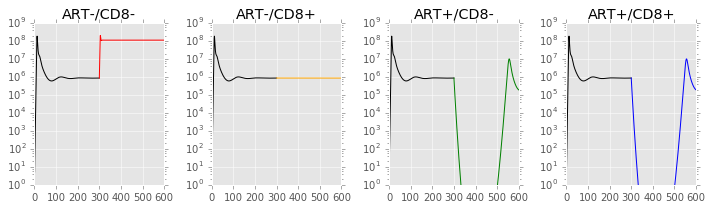

In [57]:
#natural
ode_sim = odeint(model,X0,t,(aS,dS,Bt,dI,k,aE,dE,E50,w,p,g))

X1=ode_sim[len(ode_sim)-1,:]
t1=t+t[len(t)-1]

plt.figure(figsize=(10,3))

eps=0.8 #fraction of infections allowed

#start at equilibrium with no ART and no CD8+
ode_sim2 = odeint(model,X1,t1,(aS,dS,Bt,dI,k*0,aE,dE,E50,w,p,g))
plt.subplot(141)
plt.semilogy(t,ode_sim[:,3]*1e3,color='k')
plt.semilogy(t1,ode_sim2[:,3]*1e3,color='r')
plt.title('ART-/CD8-')
plt.ylim([1,1e9])

#start at equilibrium with no ART and CD8+
ode_sim1 = odeint(model,X1,t1,(aS,dS,Bt,dI,k,aE,dE,E50,w,p,g))
plt.subplot(142)
plt.semilogy(t,ode_sim[:,3]*1e3,color='k')
plt.semilogy(t1,ode_sim1[:,3]*1e3,color='orange')
plt.title('ART-/CD8+')
plt.ylim([1,1e9])

#start at equilibrium with ART and no CD8+
ode_sim3 = odeint(model,X1,t1,(aS,dS,Bt*eps,dI,k,aE,dE,E50,w,p,g))
plt.subplot(143)
plt.semilogy(t,ode_sim[:,3]*1e3,color='k')
plt.semilogy(t1,ode_sim3[:,3]*1e3,color='g')
plt.title('ART+/CD8-')
plt.ylim([1,1e9])

#start at equilibrium with ART and CD8+
ode_sim4 = odeint(model,X1,t1,(aS,dS,Bt*eps,dI,k,aE,dE,E50,w,p,g))
plt.subplot(144)
plt.semilogy(t,ode_sim[:,3]*1e3,color='k')
plt.semilogy(t1,ode_sim4[:,3]*1e3,color='b')
plt.title('ART+/CD8+')
plt.ylim([1,1e9])

plt.tight_layout()

(1, 1000000000.0)

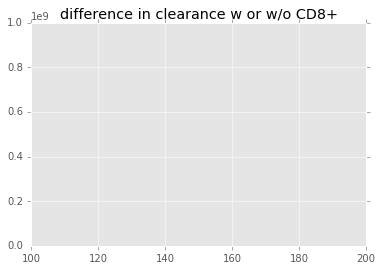

In [52]:
plt.plot(t1,(ode_sim3[:,3]-ode_sim4[:,3])*1e3,color='b')
plt.title('difference in clearance w or w/o CD8+')
plt.ylim([1,1e9])


In [49]:
ode_sim3[:,3]-ode_sim4[:,3]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0